# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random #Imports all libraries and declares them


In [63]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
n = 500
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Post Type': [random.choice(['Text', 'Image', 'Video']) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n),
    'Gender': np.random.randint(0, 2, size=n), #0 Female, 1 Male, 2 is cutoff exclusive
    'Comments': np.random.randint(0, 10000, size=n),
    'Age': np.random.randint(13, 100, size=n)
}
df = pd.DataFrame(data)
print(df.head(n)) # Generates random data dictionary

          Date Category Post Type  Likes  Gender  Comments  Age
0   2021-01-01  Culture     Video   1828       0      5869   14
1   2021-01-02  Culture     Image   4950       1      5210   17
2   2021-01-03   Travel     Image   8626       0      9461   60
3   2021-01-04   Health     Image   5860       1      3160   55
4   2021-01-05  Fashion      Text   4241       1      7224   14
..         ...      ...       ...    ...     ...       ...  ...
495 2022-05-11     Food     Video   7319       0      6121   18
496 2022-05-12  Fashion     Video   9834       0      8439   53
497 2022-05-13  Culture     Image   4946       0      3808   82
498 2022-05-14  Culture      Text   5195       0       963   94
499 2022-05-15  Culture     Video   9325       0      5183   99

[500 rows x 7 columns]


In [64]:
df = pd.DataFrame(data) # Load data into a Pandas DataFrame
print("DataFrame Head:")
print(df.head())
print("\nDataFrame Information:")
print(df.info())
print("\nDataFrame Description:") # Descriptive statistics of the DataFrame
print(df.describe())
category_count = df['Category'].value_counts()
print("\nCount of each 'Category' element:")
print(category_count)

DataFrame Head:
        Date Category Post Type  Likes  Gender  Comments  Age
0 2021-01-01  Culture     Video   1828       0      5869   14
1 2021-01-02  Culture     Image   4950       1      5210   17
2 2021-01-03   Travel     Image   8626       0      9461   60
3 2021-01-04   Health     Image   5860       1      3160   55
4 2021-01-05  Fashion      Text   4241       1      7224   14

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       500 non-null    datetime64[ns]
 1   Category   500 non-null    object        
 2   Post Type  500 non-null    object        
 3   Likes      500 non-null    int64         
 4   Gender     500 non-null    int64         
 5   Comments   500 non-null    int64         
 6   Age        500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 

In [65]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Likes'] = df['Likes'].astype(int) # Cleans any nulls and duplicates and turns dates into something computer understands, in this case an integer.


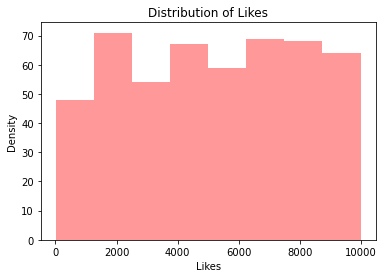

In [75]:
sns.distplot(df['Likes'], kde=False, color='#FF0000')
plt.xlabel('Likes')
plt.ylabel('Density') # How often event occurs
plt.title('Distribution of Likes')
plt.show()

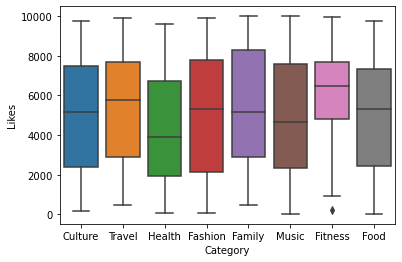

In [67]:
sns.boxplot(x='Category', y='Likes', data=df)
plt.show() #Category vs Likes

In [77]:
likes_mean = df['Likes'].mean()
print(f"\nMean of 'Likes': {likes_mean:.2f}")

# Mean of 'Likes' for each Category
category_likes_mean = df.groupby('Category')['Likes'].mean()
print("\nMean Likes for each Category:")
print(category_likes_mean)


Mean of 'Likes': 5182.41

Mean Likes for each Category:
Category
Culture    4985.142857
Family     5367.422535
Fashion    5170.506849
Fitness    6270.923077
Food       4873.700000
Health     4468.017241
Music      4998.673077
Travel     5408.234375
Name: Likes, dtype: float64


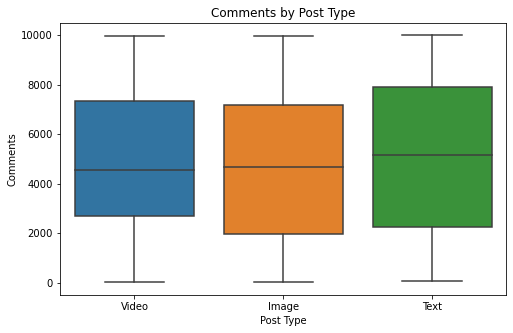

In [68]:
sns.boxplot(x='Post Type', y='Comments', data=df)
plt.title('Comments by Post Type')
plt.show() #Comments vs Post Type

In [78]:
likes_comments = df['Comments'].mean()
print(f"\nMean of 'Comments': {likes_comments:.2f}")

# Mean of 'Likes' for each Category
category_comments_mean = df.groupby('Post Type')['Comments'].mean()
print("\nMean Likes for each Post Types:")
print(category_comments_mean)


Mean of 'Comments': 4831.01

Mean Likes for each Post Types:
Post Type
Image    4647.012195
Text     5001.464286
Video    4840.184524
Name: Comments, dtype: float64


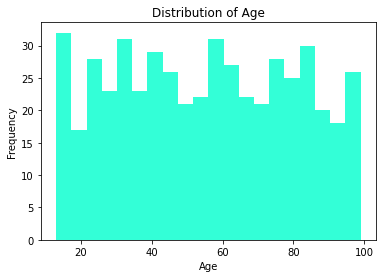

In [70]:
plt.hist(df['Age'], bins=20, color='#33FFD7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

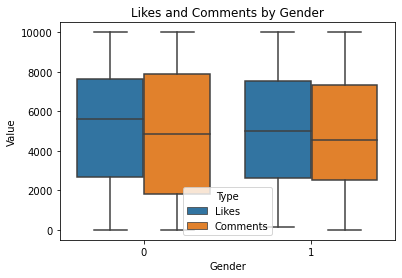

In [72]:
df_melted = pd.melt(df, id_vars=['Gender'], value_vars=['Likes', 'Comments'], var_name='Type', value_name='Value')
sns.boxplot(x='Gender', y='Value', hue='Type', data=df_melted)
plt.title('Likes and Comments by Gender')
plt.show() #Likes and Comments By Gender

In [79]:
type_value_mean = df_melted.groupby('Type')['Value'].mean()
print("\nMean Value for each Type (Likes and Comments combined):")
print(type_value_mean)


Mean Value for each Type (Likes and Comments combined):
Type
Comments    4831.014
Likes       5182.414
Name: Value, dtype: float64
